In [2]:
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline
import numpy as np

In [5]:
n_dat = np.load("../data/nrn_dat.npz")
v_dat = np.load("../data/vr_dat.npz")

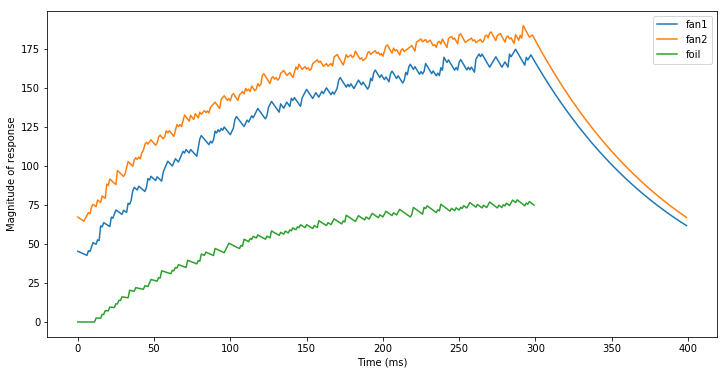

In [18]:
plt.figure(figsize=(12, 6))

line_styles = ("-", "--", ":")
label = (10, 30, 50)
l_i = 0

plt.plot(n_dat["fan1"][:, l_i], color='C0', label="fan1")
plt.plot(n_dat["fan2"][:, l_i], color='C1', label="fan2")
plt.plot(n_dat["foil"][100:, l_i], color='C2', label="foil")
    
plt.legend()
plt.xlabel("Time (ms)")
plt.ylabel("Magnitude of response")

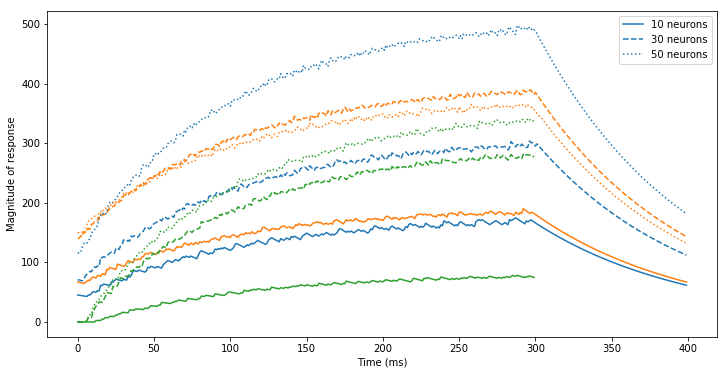

In [19]:
plt.figure(figsize=(12, 6))

line_styles = ("-", "--", ":")
label = (10, 30, 50)

for l_i, ls in enumerate(line_styles):
    plt.plot(n_dat["fan1"][:, l_i], color='C0', linestyle=ls, label="%s neurons" % label[l_i])
    plt.plot(n_dat["fan2"][:, l_i], color='C1', linestyle=ls)
    plt.plot(n_dat["foil"][100:, l_i], color='C2', linestyle=ls)
    
plt.legend()
plt.xlabel("Time (ms)")
plt.ylabel("Magnitude of response")

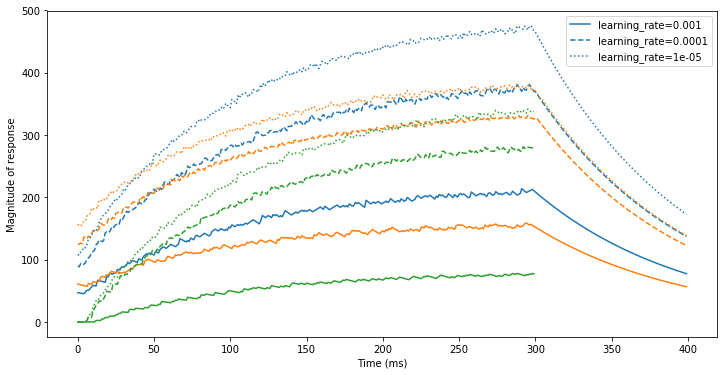

In [20]:
plt.figure(figsize=(12, 6))

line_styles = ("-", "--", ":")
label = (1e-3, 1e-4, 1e-5)

for l_i, ls in enumerate(line_styles):
    plt.plot(v_dat["fan1"][:, l_i], color='C0', linestyle=ls, label="learning_rate=%s" % label[l_i])
    plt.plot(v_dat["fan2"][:, l_i], color='C1', linestyle=ls)
    plt.plot(v_dat["foil"][100:, l_i], color='C2', linestyle=ls)
    
plt.legend()
plt.xlabel("Time (ms)")
plt.ylabel("Magnitude of response")